<a href="https://colab.research.google.com/github/BrunoRSalles/Mercado-de-Games/blob/main/Projeto_Mercado_de_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **- Análise de Mercado de Games PS4**

Dados de vendas e classificação de jogos de videogame extraidos do VzCharts





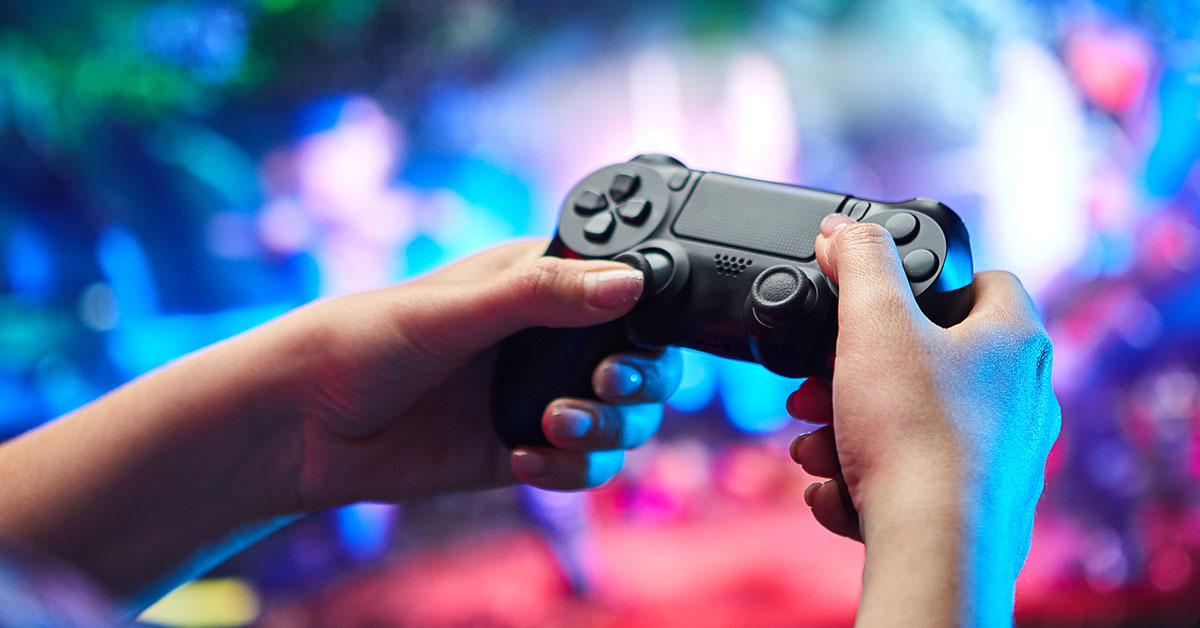


[Download da Base Dados](https://www.kaggle.com/sidtwr/videogames-sales-dataset?datasetId=189386&sortBy=voteCount) <p>


In [1]:
# Importantdo Bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Base de dados, lendo o csv
games = pd.read_csv('PS4_GamesSales.csv',  encoding='latin-1')

In [3]:
games.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


Com a base ja importada, agora vamos olhar os dados de dimensao da base e os valores nulos que ela apresenta, se caso tiver

In [4]:
# Dimensão
games.shape

(1034, 9)

In [5]:
# Descrição
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [6]:
# Valores nulos
games.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

Para gerar uma melhor vizualização desses dados um grafico será usado para dar uma ideias da dimensão dessa quantidade de valores nulos 

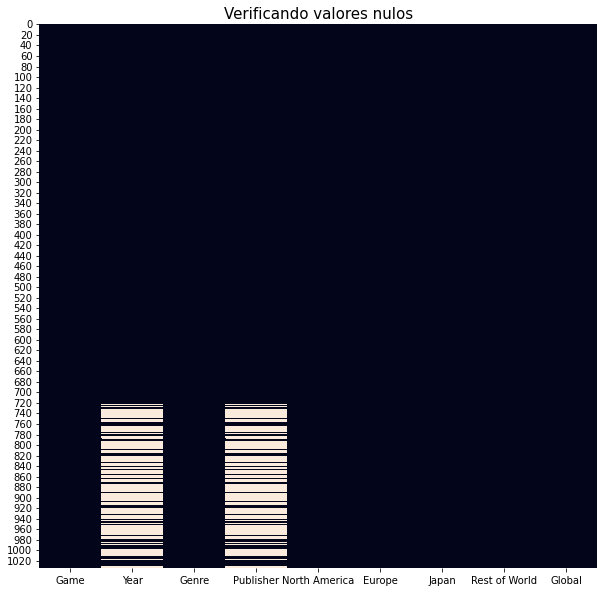

In [7]:
plt.figure(figsize=(10,10))
plt.title('Verificando valores nulos', fontsize = 15)
sns.heatmap(games.isnull(), cbar=False);

Como esses os campos ano e empresa estão nulos, nesse caso o ideal seria retira los da base de dados pois valores estatisticos não confirmariam ano e empresa faltante nas linhas da base

In [8]:
games.dropna(inplace=True)

In [9]:
games.shape

(825, 9)

Foram excluidas 209 

In [10]:
games.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


Nessa descrição podemos observar que:


*   Nossa base tem dados de 2013 a 2020
*   Que a Europa é o maior consumidor de videogames até então
*   Que só o Japão chega quase ao valor total do restante do mundo, fazendo dele um grande consumidor de games
*   Podemos ver que temos jogos que passaram de 19 milhões de vendas enquanto outros foram um total fracasso 



Comaçandop a analizar as vendas 

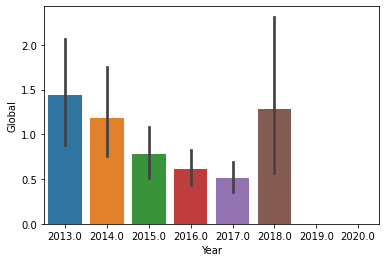

In [11]:
sns.barplot( data=games, x='Year', y='Global' );

Logo de cara podemos observar que não temos dados de vendas em 2019 e 2020. Outro buraco encontrado na nossa base de dados

In [12]:
# Limpando esses dados
games = games.loc[ ( games['Year'] != 2019 ) & ( games['Year'] != 2020 ) ]

Agora com a base limpa, teremos uma melhor vizualização do grafico


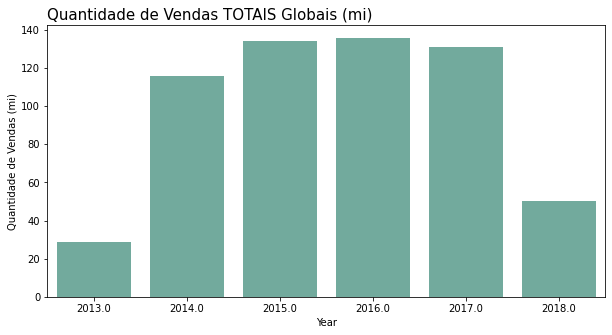

In [13]:
plt.figure( figsize=( 10,5 ) )

plt.title( 'Quantidade de Vendas TOTAIS Globais (mi)', loc= 'left', fontsize= 15 )

sns.barplot( data=games, x='Year', y='Global', ci=None, color = '#69b3a2', estimator=sum)
# o comando 'ci' serve para retirar aquelas linhas no meio da barra
# estimator foi usado para mudar a escala pois esla estava invertida

plt.ylabel( 'Quantidade de Vendas (mi)' );

Distribuição de quantidade de vendas dos anos e por continentes 

In [14]:
games.groupby( by=['Year'] ).sum() 

# Extração de quantidade de vendas por continentes e pelo mundo. Bastou apenas agrupor todo BD pelo ano e somar

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


Observando agora a distribuição dessas vendas

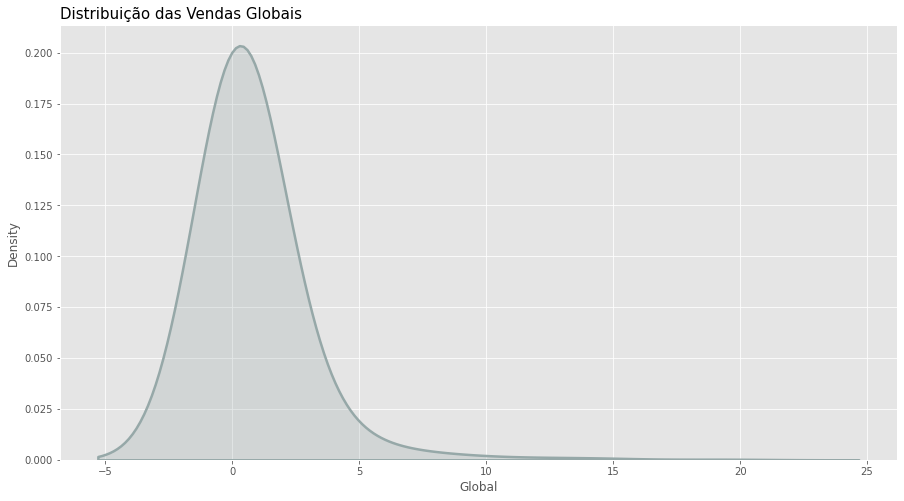

In [15]:
plt.figure(figsize=(15,8) )
plt.style.use('ggplot')
plt.title('Distribuição das Vendas Globais ', loc='left', fontsize=15)
sns.kdeplot ( 
             games['Global'],
             shade = True,   # Para colocar grades
             bw = 1,         # Trazer mais harmonia a curva no grafico
             color = '#96a8a8',
             linewidth = 2.5 # Para aumentar a grossura da linha 
);

Popdemos observar que uma grande massa de nossos dados se concentram num mesmo ponto, porem podemos ver que há alguns outliar

Que podem ser de grandes lançamentos


In [16]:
games.nlargest(10,['Global']) # Esse comando conseguiu me trazer os valores mais altos de vendas globais de forma simples, so precisei colocar o qtd e a coluna filtrada

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48


Podemos assim observar os 10 jogos que mais venderam

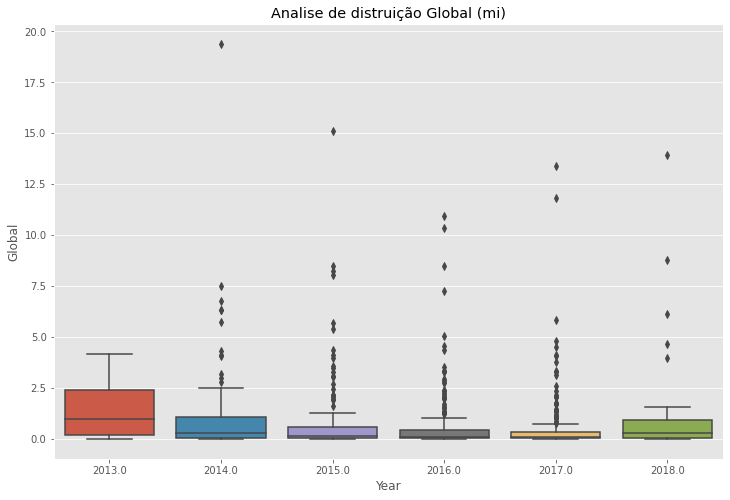

In [17]:
plt.figure( figsize=( 12,8 ) )
plt.title('Analise de distruição Global (mi)')
sns.boxplot( data=games, x = 'Year', y = 'Global' );

Nesssa area podemos observar que o comentario anterior sobre o grafico de densidade ter muitos outliars se confirma aqui

In [18]:
# Outra forma de filtrar os outlairs
games.loc[ games['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


Podemos observar que quem lidera o top 4 dessa lista é a Rockstar Games e a Activision com grandes  sucessos de lançamentos

E os jogos que lideram o Rank pela Activision são jogos de tiro, que são da famosa saga Call of Duty

In [19]:
games['Genre'].value_counts()

Action              202
Role-Playing        103
Shooter              72
Adventure            70
Sports               69
Misc                 50
Racing               47
Action-Adventure     37
Fighting             32
Platform             32
Strategy             25
Simulation           21
Music                18
Puzzle               10
Visual Novel          8
MMO                   7
Party                 2
Name: Genre, dtype: int64

Apesar do Jogo da Activision estar como segundo mais vendido da base, sua categoria de genero fica em terceiro lugar. Ficando atraz de jogos de Ação (1º) e Role Playing - RPG (2º)


Representação vizual das porcentagens de vendas por ano

In [20]:
analise = games.groupby( by=['Year'] ).sum().reset_index()

# analisando a proporção dos 100% de cada continente ao total

america = [ america / total * 100 for america, total in zip ( analise['North America'], analise['Global'] ) ]
europa = [ europa / total * 100 for europa,total in zip ( analise['Europe'], analise['Global'] ) ]
japan = [japan / total * 100 for japan, total in zip ( analise['Japan'], analise['Global'] ) ]
mundo = [mundo / total * 100 for mundo, total in zip ( analise['Rest of World'], analise['Global'] ) ]



In [21]:
mundo

[15.890125173852576,
 15.78765645230902,
 15.58325248152847,
 15.259357500736812,
 15.194805194805195,
 15.31872509960159]

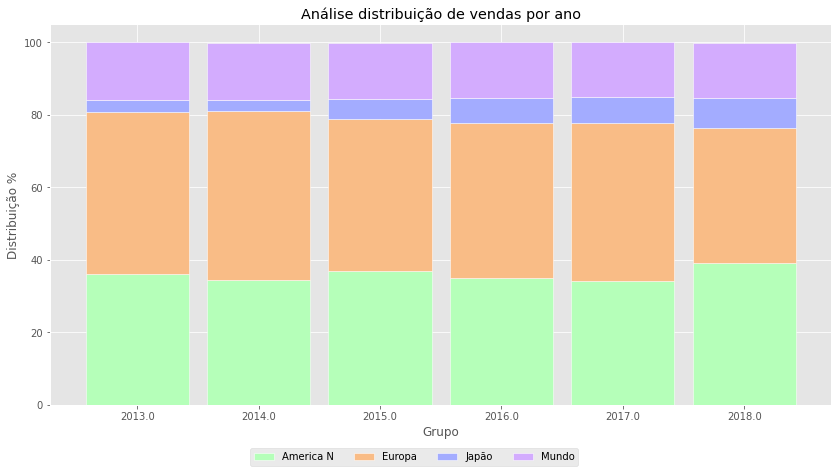

In [22]:
# Criando um grafico de barras empilhadas 

# Tamanho
plt.figure( figsize=(14,7) )

# Laragura da Barra ( colocando as configurações dentro de variaveis)
largura = 0.85
rotulo = analise['Year']
grupos = [0, 1, 2, 3, 4, 5]

# Titulo
plt.title('Análise distribuição de vendas por ano')

# Para montar o grafico precisa montar barra por barra que será empilhada

# Plot da America 
plt.bar( grupos, america, width = largura, color='#b5ffb9', edgecolor='white' )         # WIDTH é onde se coloca a largura da barra casso não queira deixar uma variavel pra ela 
                                                                                        # BOTTOM = parametro para empilhar as colunas 
# Plot da Europa
plt.bar(grupos, europa, bottom = america , width = largura , color = '#f9bc86', edgecolor = 'white' ) 

# Plot do Japão
plt.bar( grupos, japan, bottom = [a + b for a,b in zip (america, europa) ], width = largura, color = '#a3acff', edgecolor = 'white' )

# Plot do Resto do mundo
plt.bar ( grupos, mundo, bottom = [ a +b + c for a, b, c in zip ( america, europa, japan ) ], width = largura, color = '#d3acfe', edgecolor = 'white' )

# Labels
plt.xticks ( grupos , rotulo )
plt.xlabel ( 'Grupo' )
plt.ylabel ( 'Distribuição %' )

# Legenda
plt.legend ( [ 'America N', 'Europa', 'Japão', 'Mundo' ], loc= 'upper left', bbox_to_anchor = ( 0.25, -0.1 ), ncol = 4 );

Com esse grafico fica facil analizar os valore de vendas em porcentagem e por regiao ao longo dos anos. Ex:

- 2014 A Europa teve uma maior quantidade de vendas que nos anos seguintes
- Japão ao longo dos anos vem expandindo o consumo por games
- A distribuição ao longo do restante do mundo fica quase que sempre na mesma media 
- E por fim a America do Norte em 2015 e 2018 teve aumento no consumo, porem 2014, 2016 e 2017 tiveram menos vendas

Text(0.5, -0.02, '\nRelatorio elaborado para analise sobre vendas dos lançamentos de jogos do PS4\nnos ultimos anos\nby: Bruno Rodrigues\n')

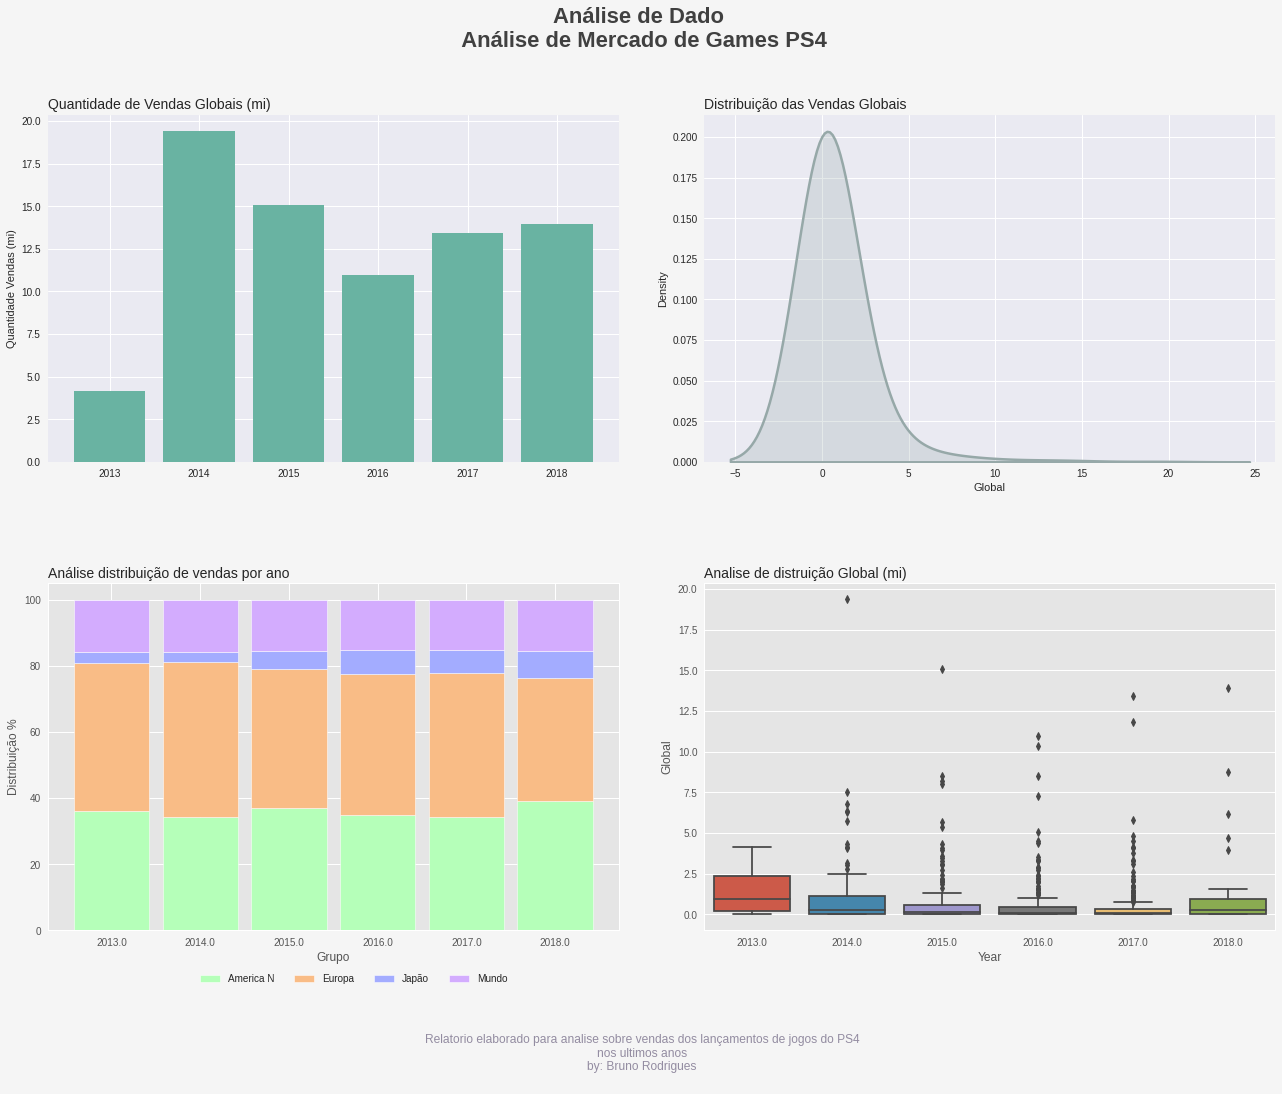

In [23]:
# Criando um relatorio

# Tamanho da imagem
fig, ax = plt.subplots( figsize=( 22, 15 ) )

# Cor de fundo do relatorio e dos graficos
cfundo = '#f5f5f5'
ax.set_facecolor( cfundo )
fig.set_facecolor( cfundo )

# Estilos dos graficos
plt.style.use( 'seaborn' )

# Titulo do Relatorio
plt.suptitle( 'Análise de Dado \n Análise de Mercado de Games PS4', fontsize=22, color='#404040', fontweight = 600 )

# Parametro para o grid
linhas = 2
colunas = 2



#____________________________________________________________Acessando grafico 1
plt.subplot( linhas, colunas, 1 )

# Titulo
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14 )
# Grafico
plt.bar( games['Year'], games['Global'], color='#69b3a2' )
# Label
plt.ylabel('Quantidade Vendas (mi)')


#____________________________________________________________Acessando grafico 2
plt.subplot( linhas, colunas, 2 )

plt.style.use('ggplot')
plt.title('Distribuição das Vendas Globais ', loc='left', fontsize=14)
sns.kdeplot ( 
             games['Global'],
             shade = True,   # Para colocar grades
             bw = 1,         # Trazer mais harmonia a curva no grafico
             color = '#96a8a8',
             linewidth = 2.5 # Para aumentar a grossura da linha 
)

#____________________________________________________________Acessando grafico 3
plt.subplot( linhas, colunas, 3 )

# Laragura da Barra ( colocando as configurações dentro de variaveis)
largura = 0.85
rotulo = analise['Year']
grupos = [0, 1, 2, 3, 4, 5]

# Titulo
plt.title('Análise distribuição de vendas por ano', loc='left', fontsize=14)

# Para montar o grafico precisa montar barra por barra que será empilhada

# Plot da America 
plt.bar( grupos, america, width = largura, color='#b5ffb9', edgecolor='white' )         # WIDTH é onde se coloca a largura da barra casso não queira deixar uma variavel pra ela 
                                                                                        # BOTTOM = parametro para empilhar as colunas 
# Plot da Europa
plt.bar(grupos, europa, bottom = america , width = largura , color = '#f9bc86', edgecolor = 'white' ) 

# Plot do Japão
plt.bar( grupos, japan, bottom = [a + b for a,b in zip (america, europa) ], width = largura, color = '#a3acff', edgecolor = 'white' )

# Plot do Resto do mundo
plt.bar ( grupos, mundo, bottom = [ a +b + c for a, b, c in zip ( america, europa, japan ) ], width = largura, color = '#d3acfe', edgecolor = 'white' )

# Labels
plt.xticks ( grupos , rotulo )
plt.xlabel ( 'Grupo' )
plt.ylabel ( 'Distribuição %' )

# Legenda
plt.legend ( [ 'America N', 'Europa', 'Japão', 'Mundo' ], loc= 'upper left', bbox_to_anchor = ( 0.25, -0.1 ), ncol = 4 )


#____________________________________________________________Acessando grafico 4
plt.subplot( linhas, colunas, 4 )

plt.title('Analise de distruição Global (mi)', loc='left', fontsize=14)
sns.boxplot( data=games, x = 'Year', y = 'Global' );


# Ajustando Layout - para um grafico não sobrepor o outro. Usando parametro para espaçar as colunas e as linhas 
plt.subplots_adjust( hspace = 0.35, wspace = 0.15  )

# Rodapé
rodape = '''
Relatorio elaborado para analise sobre vendas dos lançamentos de jogos do PS4
nos ultimos anos
by: Bruno Rodrigues
'''

# Incluindo o rodape
fig.text( 0.5, -0.02, rodape, ha='center', va='bottom', size = 12, color = '#938ca1' ) # ha= siginifica a posição que eu quero que fique o texto
                                                                                      # va= escolho a regiao onde quero que o texto fique. Ex: inferior   
                                                                                      # size nesse caso para alterar o tamanho da fonte se apenas apenas 'size'
                                                                                      # Os numeros 0.5 , -0.02 tambem servem de coordenadas o 1º serve para centralizar e o 2º para deixar baixo do grafico